<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Titillium+Web:ital,wght@0,200;0,300;0,400;0,600;0,700;0,900;1,200;1,300;1,400;1,600;1,700&display=swap" rel="stylesheet">
<div class="box" style="padding: 10px; margin: 10px 0; background-color: gray; color: white; border-radius: 5px; font-size: 15px;">
  <table style="padding: 10px; margin: auto auto; background-color: gray;  border-radius: 5px; font-size: 15px;">
      <tr>
          <th colspan='2'><h1 style="text-align: center">
Machine Learning </br>
</h1>
<h2 style="text-align: center">
Course Assignment Two </br>
</h2>
</th>
<tr>
    <tr>
      <th colspan="2">Personal Info</th>
    </tr>
    <tr>
      <td>First Name:</td>
      <td>Ali</td>
    </tr>
    <tr>
      <td>Last Name:</td>
      <td>Nikkhah</td>
    </tr>
    <tr>
      <td>Student Number:</td>
      <td>99102445</td>
    </tr>
    <tr>
      <td>Github:</td>
      <td><a href="https://github.com/AliNikkhah2001/MachineLearning02" target="_blank">https://github.com/AliNikkhah2001/MachineLearning02</a></td>
    </tr>
  </table>
</div>



## Importing Libraries

First we import libraries that we need for this assignment.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.optimize import curve_fit

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [108]:
# Read the CSV file
data = pd.read_csv("Q3/data_logistic.csv")

# Extract feature matrix X and target vector Y
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values.reshape(-1, 1)

# Print the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (10000, 3)
Shape of Y: (10000, 1)


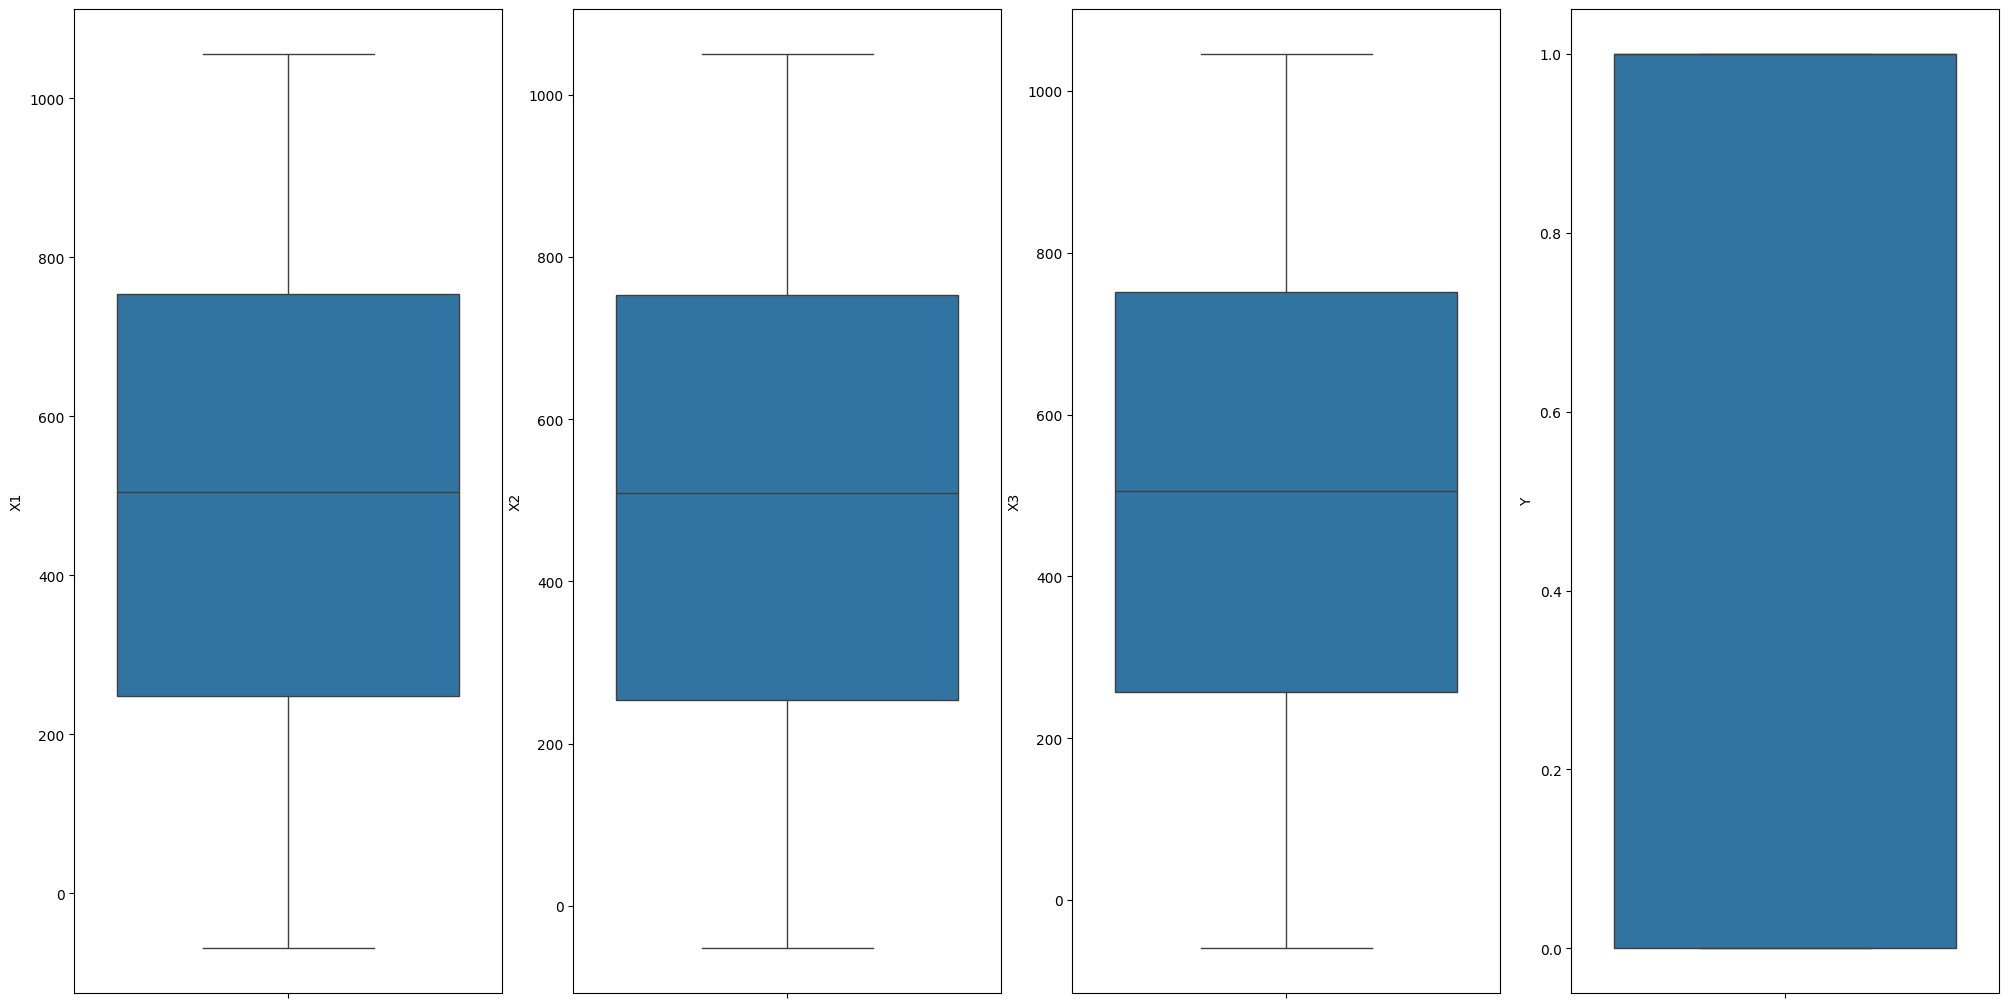

In [109]:

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

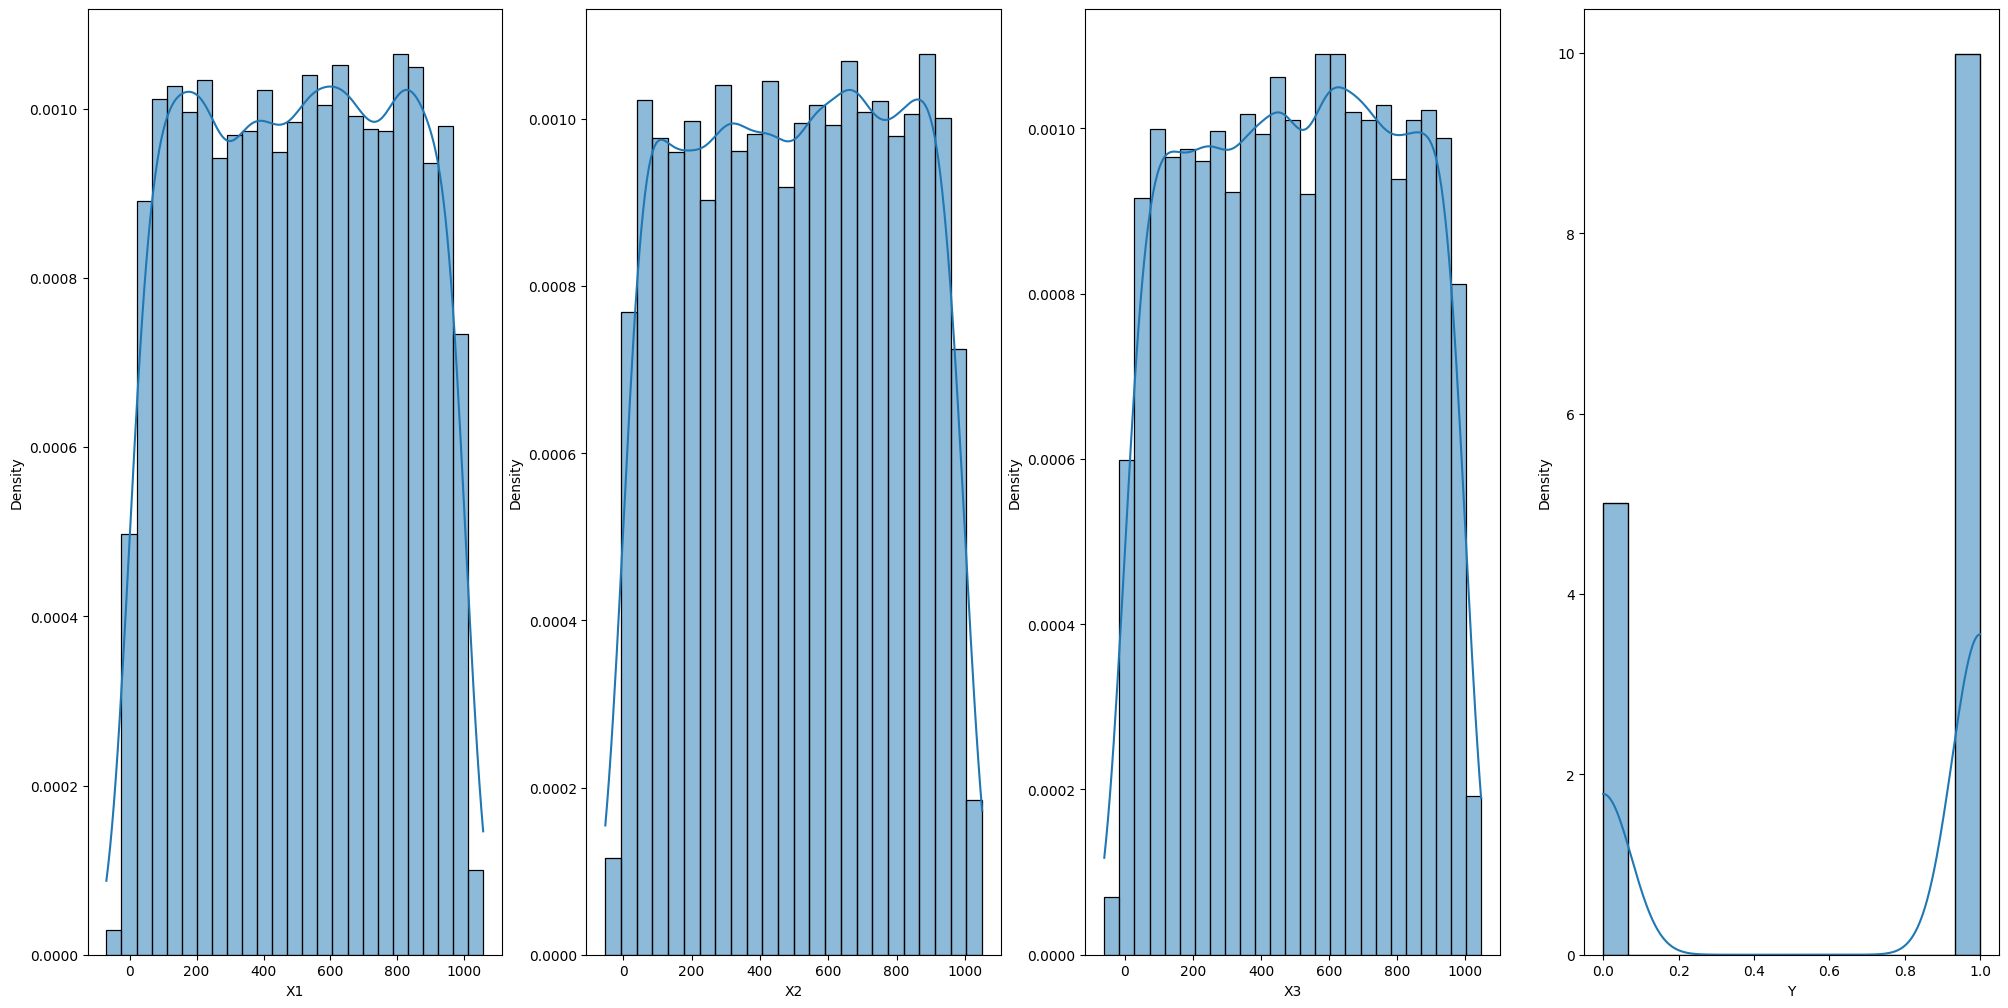

In [110]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:Normalization of data is essential before training machine learning models for several reasons:

1. **Uniform Scale**: Normalizing the data ensures that all features have the same scale, which is important for many machine learning algorithms. Without normalization, features with larger scales may dominate the learning process, leading to biased model parameters. 

   **Mathematically**: Let's consider a dataset with two features, \(X_1\) and \(X_2\), where \(X_1\) ranges from 1 to 10, and \(X_2\) ranges from 1 to 100. If we don't normalize the data, the scale of \(X_2\) will be much larger than \(X_1\), and the algorithm might give more importance to \(X_2\) during training, even if \(X_1\) is more relevant.

2. **Convergence Speed**: Normalization can help improve the convergence speed of gradient-based optimization algorithms, such as gradient descent. By scaling the features to a similar range, the optimization process can converge more quickly. 

   **Mathematically**: Consider the update rule of gradient descent: ($$\theta := \theta - \alpha \cdot \nabla J(\theta)$$ If the features are not normalized, the gradients for different features will have different scales, which can slow down the convergence of the algorithm.

3. **Better Conditioning**: Normalization can improve the numerical stability and conditioning of the optimization problem. It can help prevent issues such as vanishing or exploding gradients, which can occur when features have significantly different scales.

   **Mathematically**: In numerical optimization, the condition number of the optimization problem measures how sensitive the solution is to changes in the input data. Normalizing the data can improve the condition number and make the optimization problem better conditioned.

4. **Regularization**: Some regularization techniques, such as L1 and L2 regularization, assume that features are normalized. Normalizing the data ensures that these regularization techniques are applied uniformly across all features.

   **Mathematically**: In regularization, we add a regularization term to the cost function to prevent overfitting. The regularization term penalizes large weights, and it's important that all features are on the same scale for the regularization to work effectively.

In summary, normalization helps ensure that the optimization process is efficient, stable, and fair to all features, ultimately leading to better performance and generalization of the machine learning model.

In [111]:
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# Normalize features
X_norm = (X - mean_X) / std_X

# Store the new X and Y vectors
X = X_norm
Y = Y.flatten()#reshape Y to a vector

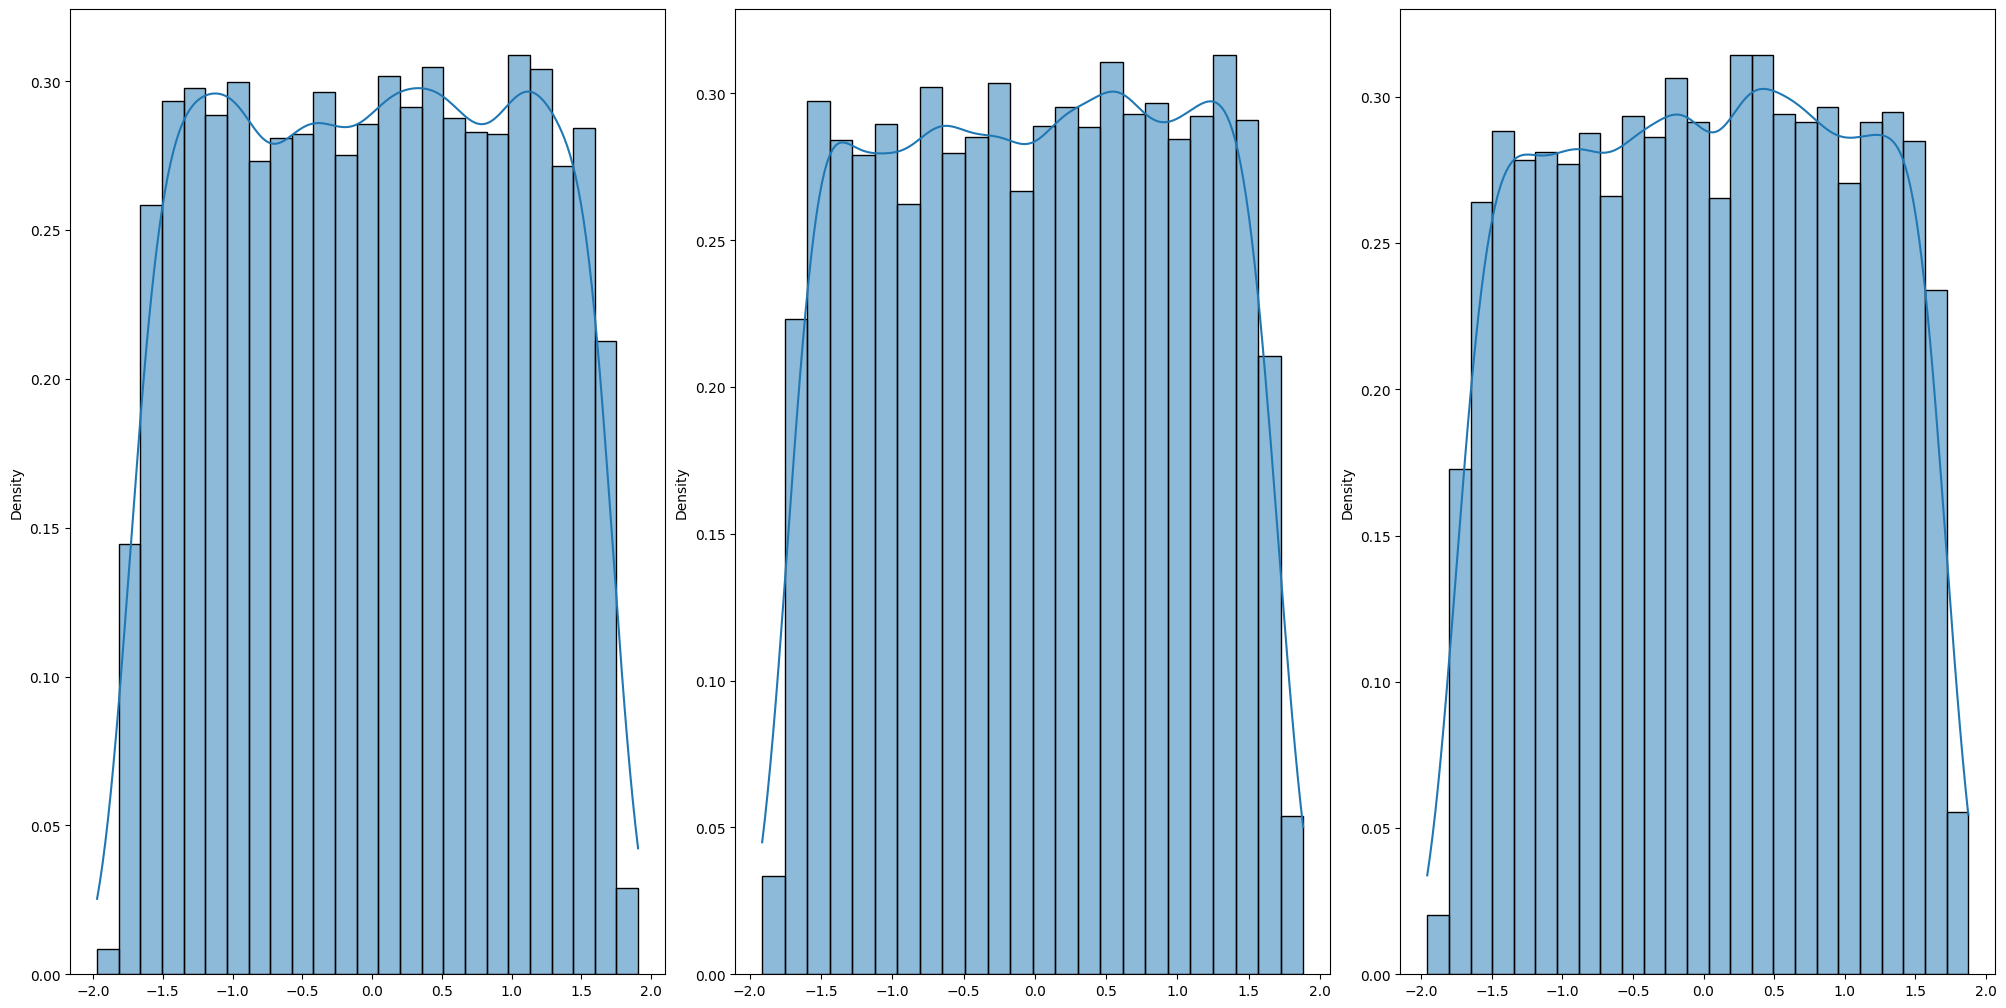

In [112]:


fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i in range(X.shape[1]):
    sns.histplot(X[:, i], ax=axs[i], kde=True, stat="density")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [113]:

# Add a column of 1s to represent the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

print(X.shape)
print(Y.shape)

(10000, 4)
(10000,)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [114]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    return 1 / (1 + np.exp(-Z))
print(sigmoid(0))
print(sigmoid(10))
print(sigmoid(-10))

0.5
0.9999546021312976
4.5397868702434395e-05


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

In [115]:
def computeCost(theta, X, y, regLambda):
    '''
    Compute cost function for logistic regression with L2 regularization
    Arguments:
        theta       is a d-dimensional numpy vector
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        regLambda   is the scalar regularization constant
    '''
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h))) + regLambda/(2*m) * np.sum(theta**2)
    return J


### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:




For the $j^{th}$ element (for $j=1...d$), the partial derivative of the cost function with respect to $\theta_j$, denoted as $\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j}$, is calculated as follows:




$$\frac{\partial}{\partial \theta_j} J_{\text{CE}}(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ \frac{y^{(i)}}{h_{\theta}(x^{(i)})} h_{\theta}(x^{(i)}) (1 - h_{\theta}(x^{(i)})) x_j^{(i)} - \frac{1 - y^{(i)}}{1 - h_{\theta}(x^{(i)})} h_{\theta}(x^{(i)}) (1 - h_{\theta}(x^{(i)})) x_j^{(i)} \right]$$

$$= -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} (1 - h_{\theta}(x^{(i)})) x_j^{(i)} - (1 - y^{(i)}) h_{\theta}(x^{(i)}) x_j^{(i)} \right]$$

$$= \frac{1}{m} \sum_{i=1}^{m} \left[ h_{\theta}(x^{(i)}) - y^{(i)} \right] x_j^{(i)}$$

$$\frac{\partial}{\partial \theta_j} J_{\text{Reg}}(\theta) = \frac{\lambda}{m} \theta_j$$

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ h_{\theta}(x^{(i)}) - y^{(i)} \right] x_j^{(i)} + \frac{\lambda}{m} \theta_j$$



$$
m \frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})x_j^{(i)} + \lambda \theta_j
$$

Where:
- $\mathcal{h}_\theta(\mathbf{x}^{(i)})$ is the predicted output for the $i^{th}$ instance.
- $y^{(i)}$ is the actual output for the $i^{th}$ instance.
- $x_j^{(i)}$ is the $j^{th}$ feature value of the $i^{th}$ instance.
- $\lambda$ is the regularization parameter.
- $m$ is the number of instances.

This equation represents the contribution of the $j^{th}$ feature to the gradient of the cost function. The first term corresponds to the derivative of the logistic loss function with respect to $\theta_j$, while the second term represents the regularization term.


In [116]:

def computeGradient(theta, X, y, regLambda):
    '''
    Compute gradient of the cost function
    Arguments:
        theta       is a d-dimensional numpy vector
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        regLambda   is the scalar regularization constant
    '''
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = 1/m * X.T.dot(h - y) + regLambda/m * theta
    return grad


### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [138]:
def fit(X, y, regLambda=0.01, alpha=0.01, epsilon=1e-4, maxNumIters=100, x_eval=None, y_eval=None):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
        x_eval,y_eval are optional evaluation data
    Output:
    theta is n-dimensional vector
    loss history of train and evaluation
    '''

    m, n = X.shape
    theta = np.zeros(n)  # Initialize theta with zeros
    loss_history = []  # Initialize list to store loss values
    loss_history_test = []

    for _ in range(maxNumIters):
        # Compute gradient
        grad = computeGradient(theta, X, y, regLambda)

        # Update theta using gradient descent
        theta_new = theta - alpha * grad

        # Check convergence
        if hasConverged(theta,theta_new,epsilon):
            break

        # Update theta and append loss value to history
        theta = theta_new
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)
        
        if x_eval is not None and y_eval is not None:
            loss_test = computeCost(theta, x_eval, y_eval, regLambda)
            loss_history_test.append(loss_test)

    return theta, loss_history, loss_history_test
def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in the previous iteration
        theta_new   is the theta calculated in the current iteration
        epsilon     is the convergence rate
    '''
    return np.linalg.norm(theta_new - theta_old) <= epsilon


Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [139]:
theta, loss_history,_= fit(X, Y)  # calculating theta and loss of each iteration

# Print loss of each iteration
for i, loss in enumerate(loss_history):
    print(f"Iteration {i+1}: Loss = {loss}")

# Print final theta
print("Final Theta:", theta)


Iteration 1: Loss = 0.6916080637619618
Iteration 2: Loss = 0.6900767197662182
Iteration 3: Loss = 0.6885531091327997
Iteration 4: Loss = 0.6870371924776978
Iteration 5: Loss = 0.6855289304758463
Iteration 6: Loss = 0.6840282838640991
Iteration 7: Loss = 0.6825352134441632
Iteration 8: Loss = 0.6810496800854845
Iteration 9: Loss = 0.6795716447280613
Iteration 10: Loss = 0.6781010683852261
Iteration 11: Loss = 0.6766379121463656
Iteration 12: Loss = 0.6751821371795885
Iteration 13: Loss = 0.6737337047343435
Iteration 14: Loss = 0.6722925761439902
Iteration 15: Loss = 0.6708587128283021
Iteration 16: Loss = 0.669432076295943
Iteration 17: Loss = 0.6680126281468669
Iteration 18: Loss = 0.6666003300746877
Iteration 19: Loss = 0.6651951438689857
Iteration 20: Loss = 0.6637970314175649
Iteration 21: Loss = 0.6624059547086681
Iteration 22: Loss = 0.6610218758331299
Iteration 23: Loss = 0.6596447569864979
Iteration 24: Loss = 0.6582745604710803
Iteration 25: Loss = 0.656911248697971
Iteration 2

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [140]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train_temp, X_test, Y_train_temp, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Split the remaining dataset (X_train_temp, Y_train_temp) into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_temp, Y_train_temp, test_size=0.222, random_state=42)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [141]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    # Compute the hypothesis using the learned parameters theta
    h = sigmoid(np.dot(X, theta))
    
    # Predict binary output based on the hypothesis
    Y = (h > 0.5).astype(int)
    
    return Y


Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**: 91.2% Accuracy 


1. **Learning Rate $\alpha$**:
   - The learning rate determines the size of the steps taken during gradient descent optimization. A large learning rate can lead to overshooting the optimal solution, while a small learning rate can result in slow convergence or getting stuck in local minima.
   - Mathematically, the parameter update rule in gradient descent is:

     $$\theta_{j}^{(t+1)} = \theta_{j}^{(t)} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta^{(t)})$$
     where $\alpha$ is the learning rate, $\theta_{j}^{(t)}$ is the \(j\)th parameter at iteration \(t\), and $\frac{\partial}{\partial \theta_{j}} J(\theta^{(t)})$ is the gradient of the cost function with respect to $\theta_j$ at iteration \(t\).
   - If the learning rate is too large, the parameter updates may oscillate or diverge, preventing convergence. On the other hand, if the learning rate is too small, convergence may be slow, requiring more iterations to reach the optimal solution.

2. **Regularization Constant $\lambda$**:
   - The regularization constant controls the impact of regularization on the model. Regularization helps prevent overfitting by penalizing large parameter values. A larger $\lambda$ encourages smaller parameter values, while a smaller $\lambda$ allows for larger parameter values.
   - Mathematically, the regularized cost function $J(\theta)$ is given by:
   - $$J(\theta) = J_{\text{CE}}(\theta) + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2$$
     where $J_{\text{CE}}(\theta)$ is the cross-entropy loss term and the second term is the regularization term.
   - Increasing $\lambda$ increases the regularization strength, which can lead to simpler models with smaller parameter values. However, too much regularization can underfit the data. Conversely, decreasing \(\lambda\) decreases the regularization strength, which can lead to overfitting if the model is too complex.

In summary, the learning rate and regularization constant need to be carefully chosen to balance the trade-off between convergence speed and model complexity. Experimenting with different values and monitoring performance on validation data can help find the best values for these hyperparameters.

Learning Rates:   0%|          | 0/3 [00:00<?, ?it/s]

Regularization Constants:   0%|          | 0/3 [00:00<?, ?it/s]

Regularization Constants:   0%|          | 0/3 [00:00<?, ?it/s]

Regularization Constants:   0%|          | 0/3 [00:00<?, ?it/s]

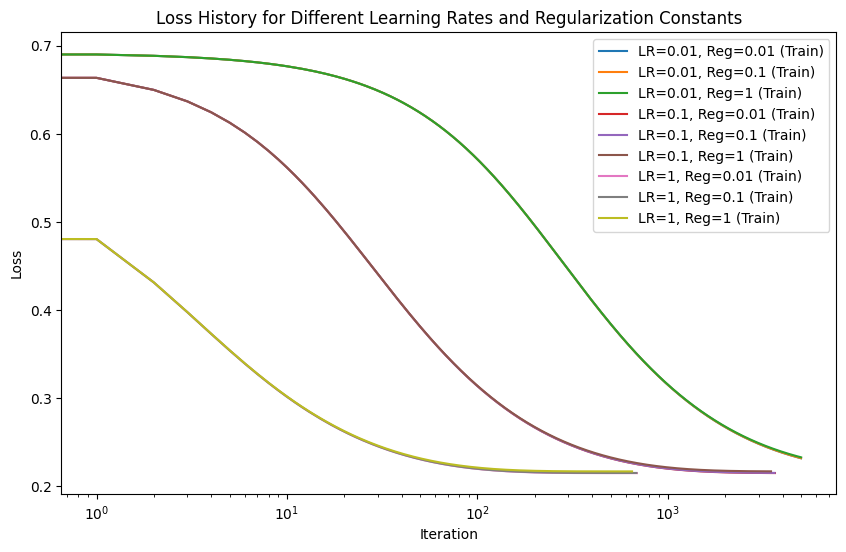

In [142]:
from tqdm.notebook import tqdm

learning_rates = [0.01,0.1,1]
regularization_constants = [0.01, 0.1, 1]
loss_history_train = {}
loss_history_test = {}

for lr in tqdm(learning_rates, desc='Learning Rates'):
    for reg in tqdm(regularization_constants, desc='Regularization Constants', leave=False):
        theta, loss_history,loss_test = fit(X_train, Y_train, regLambda=reg, alpha=lr,maxNumIters=5000,x_eval=X_val,y_eval=Y_val)
        loss_history_train[(lr, reg)] = loss_history
        # Predict on train and test data
        train_pred = predict(X_train, theta)
        train_loss = computeCost(theta, X_train, Y_train, reg)
plt.figure(figsize=(10, 6))
for (lr, reg), loss_train in loss_history_train.items():
    plt.semilogx(loss_train, label=f'LR={lr}, Reg={reg} (Train)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.legend()
plt.show()



Learning Rate: 0.01:   0%|          | 0/3 [00:00<?, ?it/s]

Learning Rate: 0.1:   0%|          | 0/3 [00:00<?, ?it/s]

Learning Rate: 1:   0%|          | 0/3 [00:00<?, ?it/s]

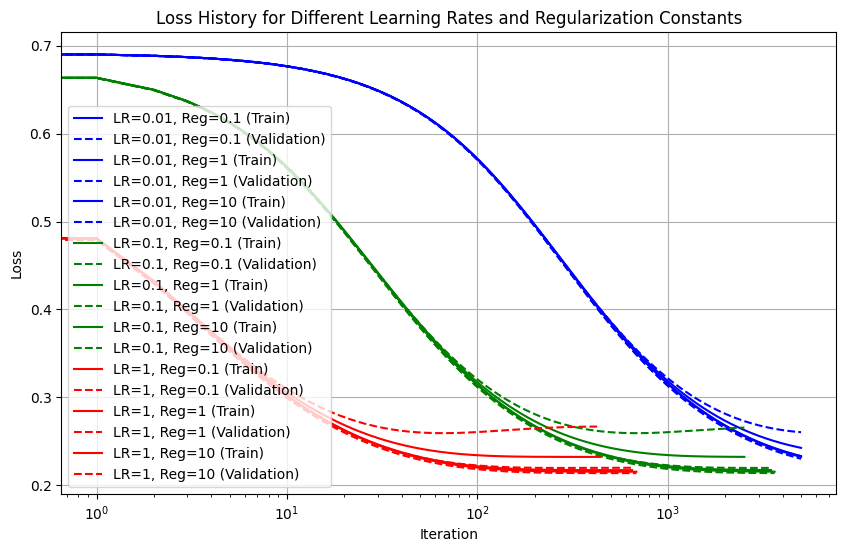

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

learning_rates = [0.01, 0.1, 1]
regularization_constants = [0.1, 1, 10]
loss_history_train = {}
loss_history_val = {}

# Define a color palette for learning rates
colors = ['b', 'g', 'r']

for lr, color in zip(learning_rates, colors):
    for reg in tqdm(regularization_constants, desc=f'Learning Rate: {lr}'):
        theta, loss_train, loss_val = fit(X_train, Y_train, regLambda=reg, alpha=lr, maxNumIters=5000, x_eval=X_val, y_eval=Y_val)
        loss_history_train[(lr, reg)] = loss_train
        loss_history_val[(lr, reg)] = loss_val

plt.figure(figsize=(10, 6))

for i, ((lr, reg), loss_train) in enumerate(loss_history_train.items()):
    plt.semilogx(np.arange(len(loss_train)), loss_train, color=colors[i // len(regularization_constants)], label=f'LR={lr}, Reg={reg} (Train)')
    plt.semilogx(np.arange(len(loss_history_val[(lr, reg)])), loss_history_val[(lr, reg)], color=colors[i // len(regularization_constants)], linestyle='--', label=f'LR={lr}, Reg={reg} (Validation)')

plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Learning Rate: 0.01:   0%|          | 0/3 [00:00<?, ?it/s]

Learning Rate: 0.1:   0%|          | 0/3 [00:00<?, ?it/s]

Learning Rate: 1:   0%|          | 0/3 [00:00<?, ?it/s]

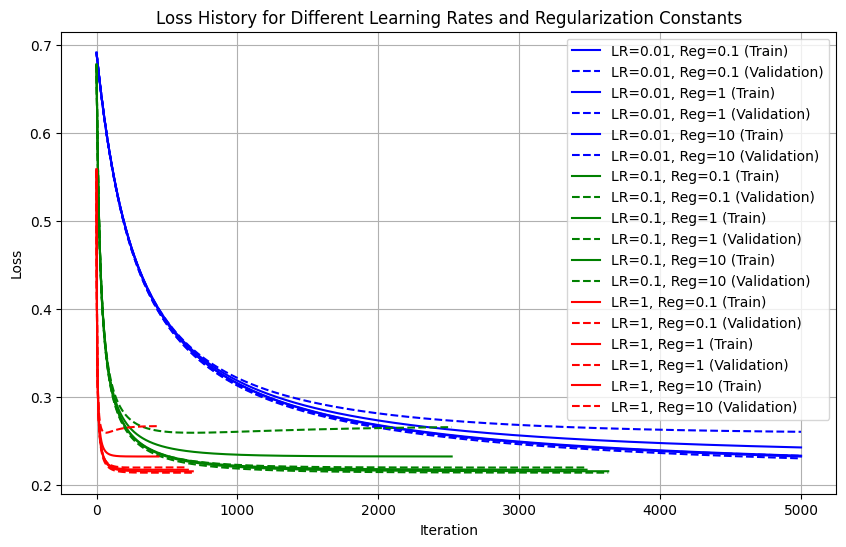

In [144]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

learning_rates = [0.01, 0.1, 1]
regularization_constants = [0.1, 1, 10]
loss_history_train = {}
loss_history_val = {}

# Define a color palette for learning rates
colors = ['b', 'g', 'r']

for lr, color in zip(learning_rates, colors):
    for reg in tqdm(regularization_constants, desc=f'Learning Rate: {lr}'):
        theta, loss_train, loss_val = fit(X_train, Y_train, regLambda=reg, alpha=lr, maxNumIters=5000, x_eval=X_val, y_eval=Y_val)
        loss_history_train[(lr, reg)] = loss_train
        loss_history_val[(lr, reg)] = loss_val

plt.figure(figsize=(10, 6))

for i, ((lr, reg), loss_train) in enumerate(loss_history_train.items()):
    plt.plot(np.arange(len(loss_train)), loss_train, color=colors[i // len(regularization_constants)], label=f'LR={lr}, Reg={reg} (Train)')
    plt.plot(np.arange(len(loss_history_val[(lr, reg)])), loss_history_val[(lr, reg)], color=colors[i // len(regularization_constants)], linestyle='--', label=f'LR={lr}, Reg={reg} (Validation)')

plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Redo Of the last part on dataset 3

In [124]:
# Read the CSV file
data = pd.read_csv("Q3/data3_logistic.csv")

# Extract feature matrix X and target vector Y
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values.reshape(-1, 1)

# Print the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (10000, 3)
Shape of Y: (10000, 1)


In [125]:
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# Normalize features
X_norm = (X - mean_X) / std_X

# Store the new X and Y vectors
X = X_norm
Y = Y.flatten()

In [126]:

# Add a column of 1s to represent the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

print(X.shape)

(10000, 4)


In [127]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train_temp, X_test, Y_train_temp, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Split the remaining dataset (X_train_temp, Y_train_temp) into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_temp, Y_train_temp, test_size=0.222, random_state=42)


In [128]:
theta, loss_history,_ = fit(X, Y)  # calculating theta and loss of each iteration

# Print final theta
print("Final Theta:", theta)
    

Final Theta: [-0.06069486 -0.16557965  0.29972024  0.00508142]


Learning Rate: 0.01:   0%|          | 0/3 [00:00<?, ?it/s]

Learning Rate: 0.1:   0%|          | 0/3 [00:00<?, ?it/s]

Learning Rate: 1:   0%|          | 0/3 [00:00<?, ?it/s]

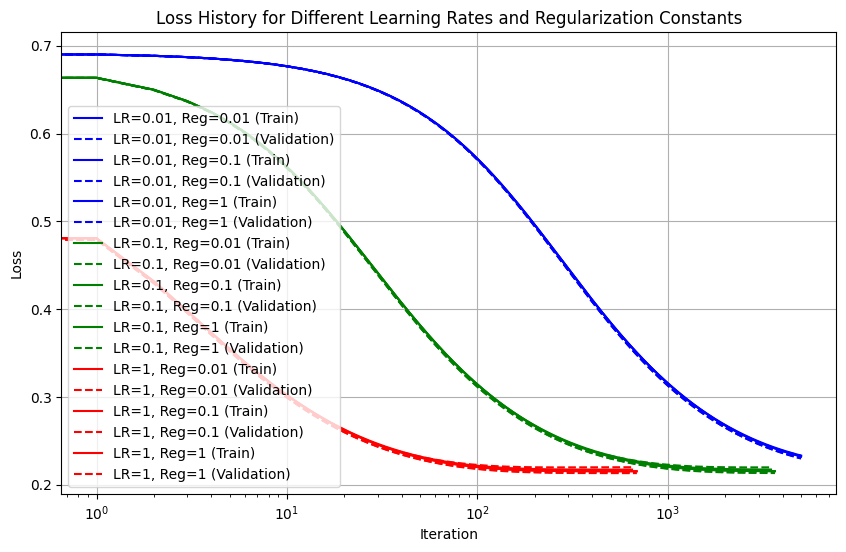

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

learning_rates = [0.01, 0.1, 1]
regularization_constants = [0.01, 0.1, 1]
loss_history_train = {}
loss_history_val = {}

# Define a color palette for learning rates
colors = ['b', 'g', 'r']

for lr, color in zip(learning_rates, colors):
    for reg in tqdm(regularization_constants, desc=f'Learning Rate: {lr}'):
        theta, loss_train, loss_val = fit(X_train, Y_train, regLambda=reg, alpha=lr, maxNumIters=5000, x_eval=X_val, y_eval=Y_val)
        loss_history_train[(lr, reg)] = loss_train
        loss_history_val[(lr, reg)] = loss_val
        print(

plt.figure(figsize=(10, 6))

for i, ((lr, reg), loss_train) in enumerate(loss_history_train.items()):
    plt.semilogx(np.arange(len(loss_train)), loss_train, color=colors[i // len(regularization_constants)], label=f'LR={lr}, Reg={reg} (Train)')
    plt.semilogx(np.arange(len(loss_history_val[(lr, reg)])), loss_history_val[(lr, reg)], color=colors[i // len(regularization_constants)], linestyle='--', label=f'LR={lr}, Reg={reg} (Validation)')

plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Learning Rates: 100%|███████████████████████████| 10/10 [00:07<00:00,  1.35it/s]


Optimum Learning Rate: 20
Optimum Regularization Constant: 0.001
Accuracy achieved:  91.4


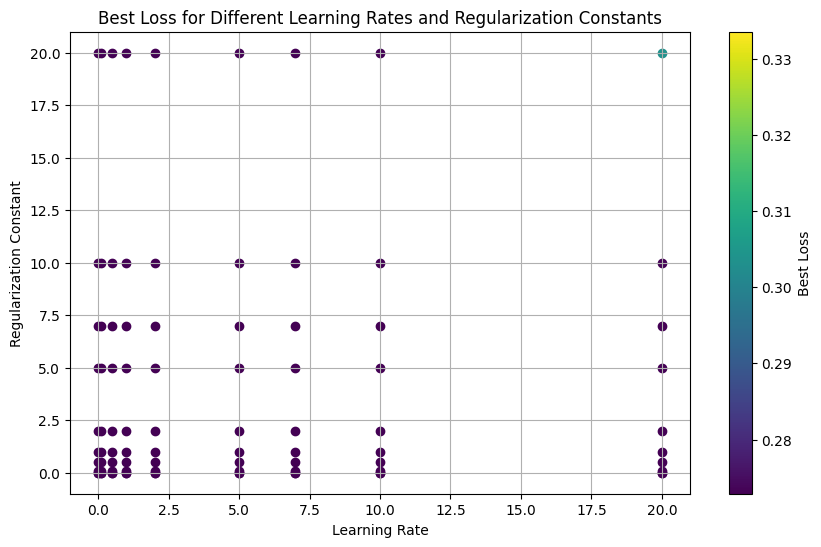

Optimum Learning Rate: 20
Optimum Regularization Constant: 0.001


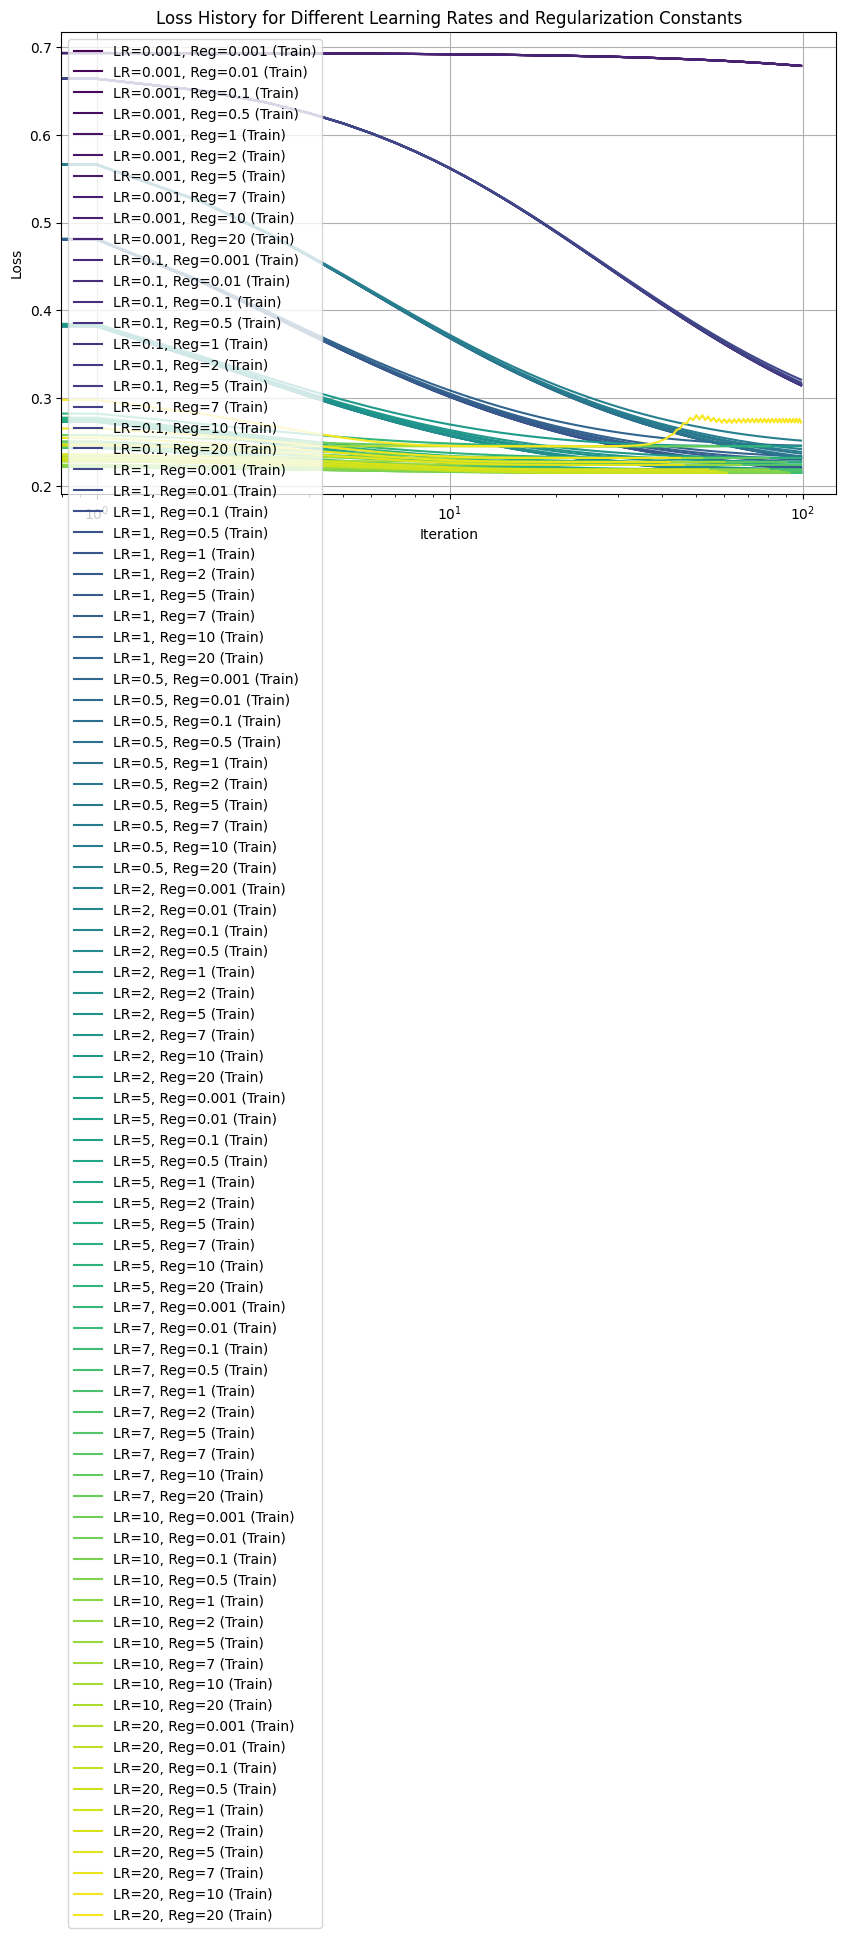

In [148]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def fit_and_report(X_train, Y_train, X_val, Y_val, regLambda, alpha, maxNumIters=5000):
    theta, loss_train, loss_val = fit(X_train, Y_train, regLambda=regLambda, alpha=alpha, maxNumIters=maxNumIters, x_eval=X_val, y_eval=Y_val)
    return theta, loss_train, loss_val

def calculate_accuracy(X, Y, theta):
    # Predict output based on theta
    Y_pred = predict(X, theta)
    # Calculate accuracy
    accuracy = np.mean(Y_pred == Y) * 100
    return accuracy

learning_rates = [0.001, 0.1, 1, 0.5, 1, 2, 5, 7, 10, 20]
regularization_constants = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 7, 10, 20]

loss_history_train = {}
loss_history_val = {}
best_loss_dict = {}

for lr in tqdm(learning_rates, desc='Learning Rates'):
    for reg in regularization_constants:
        theta, loss_train, loss_val = fit_and_report(X_train, Y_train, X_val, Y_val, regLambda=reg, alpha=lr,maxNumIters=100)
        loss_history_train[(lr, reg)] = loss_train
        loss_history_val[(lr, reg)] = loss_val
        
        best_loss = min(loss_val)  # Find the minimum loss value from loss_val
        best_loss_dict[(lr, reg)] = best_loss


best_lr, best_reg = min(best_loss_dict, key=best_loss_dict.get)
print(f'Optimum Learning Rate: {best_lr}')
print(f'Optimum Regularization Constant: {best_reg}')

# Train the model on optimum hyperparameters
theta_opt, _, _ = fit_and_report(X_train, Y_train, X_val, Y_val, regLambda=best_reg, alpha=best_lr)
print('Accuracy achieved: ',calculate_accuracy(X_test,Y_test,theta_opt))



                                 
plt.figure(figsize=(10, 6))
for i, ((lr, reg), best_loss) in enumerate(best_loss_dict.items()):
    plt.scatter(lr, reg, c=best_loss, cmap='viridis')
plt.colorbar(label='Best Loss')
plt.xlabel('Learning Rate')
plt.ylabel('Regularization Constant')
plt.title('Best Loss for Different Learning Rates and Regularization Constants')
plt.grid(True)
plt.show()

best_lr, best_reg = min(best_loss_dict, key=best_loss_dict.get)
print(f'Optimum Learning Rate: {best_lr}')
print(f'Optimum Regularization Constant: {best_reg}')

plt.figure(figsize=(10, 6))
for i, ((lr, reg), loss_train) in enumerate(loss_history_train.items()):
    plt.semilogx(np.arange(len(loss_train)), loss_train, color=plt.cm.viridis(i / len(loss_history_train)), label=f'LR={lr}, Reg={reg} (Train)')
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()






## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 90%

In [130]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training set
gnb.fit(X_train, Y_train)

# Predict the labels of the test set
y_pred = gnb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy of Gaussian Naive Bayes on test set:", accuracy)


Accuracy of Gaussian Naive Bayes on test set: 0.894


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:90%

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Instantiate the LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier on the training set
lda.fit(X_train, Y_train)

# Predict the labels for the test set
y_pred = lda.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of LDA on test set:", accuracy)


Accuracy of LDA on test set: 0.905


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: in the above experiments, Logistic Regression with hyperparameter selection is the best method among all with 91.4% accuracy.